In [3]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pyspark

     |████████████████████████████████| 212.4MB 66kB/s 
     |████████████████████████████████| 204kB 20.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=a9e7803006fd7770ea459f18acbb5247780943faf5ad09fd758870bcd3c5db89
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [6]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Bank-ml-pyspark").getOrCreate()

In [7]:
df = spark.read.format('csv').option('header', True).load("/content/drive/MyDrive/Bank_PySpark /bank.csv",inferSchema = True)

In [8]:
df.show(5)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|unknown|  5| 

In [9]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [10]:
df.groupby('deposit').count().show()

+-------+-----+
|deposit|count|
+-------+-----+
|     no| 5873|
|    yes| 5289|
+-------+-----+



In [11]:
df.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|   11162|             11162|11162|             11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null|    null

In [12]:
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('deposit', 'string')]

In [13]:
## Extract all numeric columns

numeric_variables = []

for i in df.dtypes:
    if i[1] == 'int':
        numeric_variables.append(i[0])
        
numeric_variables

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
df.select(numeric_variables).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|           balance|               day|          duration|          campaign|             pdays|          previous|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|             11162|             11162|             11162|             11162|             11162|             11162|             11162|
|   mean|41.231947679627304|1528.5385235620856|15.658036194230425|371.99381831213043| 2.508421429851281| 51.33040673714388|0.8325568894463358|
| stddev|11.913369192215518| 3225.413325946149| 8.420739541006462|347.12838571630687|2.7220771816614824|108.75828197197717| 2.292007218670508|
|    min|                18|             -6847|                 1|                 2|                 1|                -1|                 0|

In [15]:
numeric_data = df.select(numeric_variables)
numeric_data.show()

+---+-------+---+--------+--------+-----+--------+
|age|balance|day|duration|campaign|pdays|previous|
+---+-------+---+--------+--------+-----+--------+
| 59|   2343|  5|    1042|       1|   -1|       0|
| 56|     45|  5|    1467|       1|   -1|       0|
| 41|   1270|  5|    1389|       1|   -1|       0|
| 55|   2476|  5|     579|       1|   -1|       0|
| 54|    184|  5|     673|       2|   -1|       0|
| 42|      0|  5|     562|       2|   -1|       0|
| 56|    830|  6|    1201|       1|   -1|       0|
| 60|    545|  6|    1030|       1|   -1|       0|
| 37|      1|  6|     608|       1|   -1|       0|
| 28|   5090|  6|    1297|       3|   -1|       0|
| 38|    100|  7|     786|       1|   -1|       0|
| 30|    309|  7|    1574|       2|   -1|       0|
| 29|    199|  7|    1689|       4|   -1|       0|
| 46|    460|  7|    1102|       2|   -1|       0|
| 31|    703|  8|     943|       2|   -1|       0|
| 35|   3837|  8|    1084|       1|   -1|       0|
| 32|    611|  8|     541|     

In [16]:
#Correlation Matrix
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
 
assembler = VectorAssembler(
  inputCols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
  , outputCol = "features"
)
assembled = assembler.transform(numeric_data)
 
pearson_corr = Correlation.corr(assembled, "features")
 
corr_list = pearson_corr.head()[0].toArray().tolist()
pearson_corr_df = spark.createDataFrame(corr_list)
pearson_corr_df.show(truncate=False)

+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+---------------------+
|_1                   |_2                   |_3                   |_4                   |_5                   |_6                  |_7                   |
+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+---------------------+
|1.0                  |0.11229988859873077  |-7.624209205460373E-4|1.892280737142355E-4 |-0.005277936156040414|0.002773834311769889|0.020168561218448653 |
|0.11229988859873077  |1.0                  |0.010467439549070189 |0.022436131268962788 |-0.013893822542985367|0.01741114863267663 |0.03080524687156654  |
|-7.624209205460373E-4|0.010467439549070189 |1.0                  |-0.018511399167089358|0.13700683429735389  |-0.07723161298141434|-0.05898068354621966 |
|1.892280737142355E-4 |0.022436131268962788 |-0.018511399167089358|1.0

In [17]:
df.show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  

In [18]:
# Dropping day and month columns from original dataframe
df_final = df.drop("day","month")

In [19]:
df_final.show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+--------+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|contact|duration|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+-------+--------+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|    1042|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|    1467|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|    1389|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|     579|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  no|unknown|     673|       2|   -1|       0| unknown|    yes|
| 42| ma

In [20]:
print((df.count(), len(df.columns)))
print((df_final.count(), len(df_final.columns)))
print((numeric_data.count(), len(numeric_data.columns)))
df_final.dtypes

(11162, 17)
(11162, 15)
(11162, 7)


[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('deposit', 'string')]

In [21]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
categorical_variables = []

for i in df.dtypes:
    if i[1] == 'string':
        categorical_variables.append(i[0])
print(categorical_variables)       
categorical_variables.remove('deposit')
categorical_variables.remove('month')
print(categorical_variables)
stages = []
print(stages)

#Stringindexer and OneHotEncoderEstimator for all categorical variables
for categorical_col in categorical_variables:
  stringIndexer = StringIndexer(inputCol= categorical_col, outputCol= categorical_col + "Index")
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categorical_col + "classVec"])
  stages += [stringIndexer, encoder]
print(stages)

#StringIndexer for target variable
string_indexer_label = StringIndexer(inputCol='deposit', outputCol= 'label')
stages +=[string_indexer_label]
print(stages)

#########Vector Assembler#######
###NOTE: When running the first time, please uncomment the next two commented code for removing the 2nd item in list (since we don't need it)
del(numeric_variables[2])
numeric_variables

assembler_inputs = [x + "classVec" for x in categorical_variables] + numeric_variables
assembler_inputs
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
stages +=[assembler]
print(stages)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
[]
[StringIndexer_f9ec692fd80c, OneHotEncoder_6be121e2da2a, StringIndexer_3aa7b56d57e1, OneHotEncoder_347aafc19a80, StringIndexer_af6cf4689557, OneHotEncoder_ec6f0699a16f, StringIndexer_651f1b4ea40f, OneHotEncoder_a8cd6d2c1a4f, StringIndexer_621212989207, OneHotEncoder_57b800a9104c, StringIndexer_7c75f1f74325, OneHotEncoder_e986f7099853, StringIndexer_d95c52f9d115, OneHotEncoder_f3045f1ab21d, StringIndexer_0d16e0841eb9, OneHotEncoder_58a373fc5b67]
[StringIndexer_f9ec692fd80c, OneHotEncoder_6be121e2da2a, StringIndexer_3aa7b56d57e1, OneHotEncoder_347aafc19a80, StringIndexer_af6cf4689557, OneHotEncoder_ec6f0699a16f, StringIndexer_651f1b4ea40f, OneHotEncoder_a8cd6d2c1a4f, StringIndexer_621212989207, OneHotEncoder_57b800a9104c, StringIndexer_7c75f1f74325, OneHotEncoder_e986f7099853, StringIndexer_d95c52f

In [22]:
#Building our Machine Learning Pipeline
cols = df_final.columns
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipeline_model = pipeline.fit(df_final)
df_final = pipeline_model.transform(df_final)
all_columns = ['label', 'features'] + cols
df_final = df_final.select(all_columns)
df_final.dtypes



[('label', 'double'),
 ('features', 'vector'),
 ('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('deposit', 'string')]

In [23]:
df_pandas = df_final.toPandas()
#df_pandas.head(3)
df_pandas.iloc[3,1]


SparseVector(30, {4: 1.0, 11: 1.0, 13: 1.0, 16: 1.0, 18: 1.0, 20: 1.0, 21: 1.0, 24: 55.0, 25: 2476.0, 26: 579.0, 27: 1.0, 28: -1.0})

In [24]:
#df_pandas

In [25]:
categorical_variables
for i in df_pandas[categorical_variables]:
  print(i, df_pandas[i].unique(), len(df_pandas[i].unique()))
# We need to perform n - 1 for each category because of DropLast = True. 
# Currently, there are n categories for each feature in this loop. 
# Post n-1, we get a total of 24 categories in dataset and combining them with 6 numeric features, gives us a total of 30 features, which can be
# seen from the feature variable, which has been created via assembling all data points per row to form a feature vector (per row).

job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student'] 12
marital ['married' 'single' 'divorced'] 3
education ['secondary' 'tertiary' 'primary' 'unknown'] 4
default ['no' 'yes'] 2
housing ['yes' 'no'] 2
loan ['no' 'yes'] 2
contact ['unknown' 'cellular' 'telephone'] 3
poutcome ['unknown' 'other' 'failure' 'success'] 4


In [26]:
#Train - Test Split
train, test = df_final.randomSplit([0.7, 0.3], seed = 111)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))


Training Dataset Count: 7843
Test Dataset Count: 3319


In [27]:
#Logistic Regression
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=20)
lrModel = lr.fit(train)

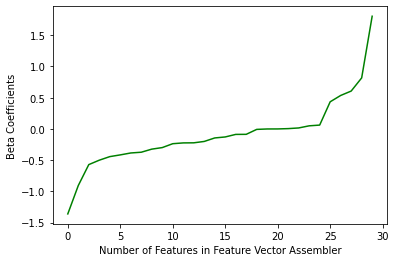

In [28]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta, color = 'green')
plt.ylabel('Beta Coefficients')
plt.xlabel('Number of Features in Feature Vector Assembler')
plt.show()


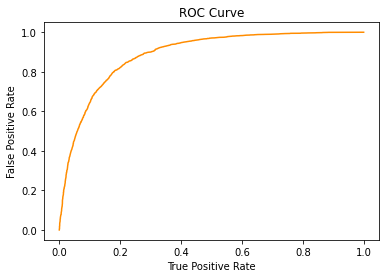

Training set areaUnderROC: 0.8873176438519467


In [29]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'], color = "darkorange")
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

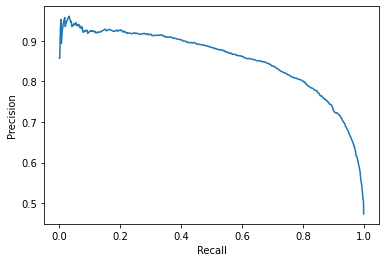

In [30]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [31]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 34|management|  0.0|[0.23227426403389...|       0.0|[0.55780889383587...|
| 37|management|  0.0|[1.07827232318531...|       0.0|[0.74616689732780...|
| 42|management|  0.0|[1.42350053763192...|       0.0|[0.80588660378317...|
| 32|management|  0.0|[1.13670611552191...|       0.0|[0.75707436465925...|
| 44|management|  0.0|[0.94144140626849...|       0.0|[0.71939072279361...|
| 57|management|  0.0|[1.08710009769855...|       0.0|[0.74783525786982...|
| 36|management|  0.0|[1.13336142708195...|       0.0|[0.75645870494901...|
| 40|management|  0.0|[1.53363719113977...|       0.0|[0.82253785555589...|
| 46|management|  0.0|[2.10550235325418...|       0.0|[0.89143682923626...|
| 47|management|  0.0|[0.60209164847146...|       0.0|[0.64613469651098...|
+---+-------

In [32]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.882180280221685


In [33]:
# Decision Trees
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)





+---+----------+-----+--------------+----------+--------------------+
|age|       job|label| rawPrediction|prediction|         probability|
+---+----------+-----+--------------+----------+--------------------+
| 34|management|  0.0|[845.0,1392.0]|       1.0|[0.37773804202056...|
| 37|management|  0.0|[2489.0,487.0]|       0.0|[0.83635752688172...|
| 42|management|  0.0|[2489.0,487.0]|       0.0|[0.83635752688172...|
| 32|management|  0.0|[2489.0,487.0]|       0.0|[0.83635752688172...|
| 44|management|  0.0|[2489.0,487.0]|       0.0|[0.83635752688172...|
| 57|management|  0.0|[2489.0,487.0]|       0.0|[0.83635752688172...|
| 36|management|  0.0|  [416.0,38.0]|       0.0|[0.91629955947136...|
| 40|management|  0.0|  [416.0,38.0]|       0.0|[0.91629955947136...|
| 46|management|  0.0|[2489.0,487.0]|       0.0|[0.83635752688172...|
| 47|management|  0.0|[845.0,1392.0]|       1.0|[0.37773804202056...|
+---+----------+-----+--------------+----------+--------------------+
only showing top 10 

In [34]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7688262112991489


In [35]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 34|management|  0.0|[9.60493129370130...|       1.0|[0.48024656468506...|
| 37|management|  0.0|[14.7931681953967...|       0.0|[0.73965840976983...|
| 42|management|  0.0|[14.2619205875643...|       0.0|[0.71309602937821...|
| 32|management|  0.0|[15.1212713916369...|       0.0|[0.75606356958184...|
| 44|management|  0.0|[14.7931681953967...|       0.0|[0.73965840976983...|
| 57|management|  0.0|[14.5923319837989...|       0.0|[0.72961659918994...|
| 36|management|  0.0|[14.0456675757228...|       0.0|[0.70228337878614...|
| 40|management|  0.0|[14.0456675757228...|       0.0|[0.70228337878614...|
| 46|management|  0.0|[16.5317096662812...|       0.0|[0.82658548331406...|
| 47|management|  0.0|[8.74282839146477...|       1.0|[0.43714141957323...|
+---+-------

In [36]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8740465851804623


In [37]:
#Gradient Boosting Tree Classifier
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 34|management|  0.0|[-0.1379334480210...|       1.0|[0.43146735146133...|
| 37|management|  0.0|[0.62197489330243...|       0.0|[0.77625078341155...|
| 42|management|  0.0|[1.20862248237840...|       0.0|[0.91813290106157...|
| 32|management|  0.0|[0.70697416510970...|       0.0|[0.80438795213405...|
| 44|management|  0.0|[0.66751006881570...|       0.0|[0.79166981202314...|
| 57|management|  0.0|[0.56219096811074...|       0.0|[0.75480061571150...|
| 36|management|  0.0|[1.12218258958006...|       0.0|[0.90416337754277...|
| 40|management|  0.0|[1.22491088090701...|       0.0|[0.92054841562509...|
| 46|management|  0.0|[0.58568503698017...|       0.0|[0.76339257374513...|
| 47|management|  0.0|[-0.2573502089919...|       1.0|[0.37409228589155...|
+---+-------

In [38]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))


Test Area Under ROC: 0.8836635519598336


In [39]:
# K-Fold Cross Validation with hyperparameter tuning (for GBT Classifier since it provided highest accuracy prior to cross validation) 
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

0.8910054649344297